
# MLS Base Salary Payroll Against Winning Percentage
 How Your Favorite Futbol Team Spends Its Money 

In this notebook I gathered data from the MLS which ranged from 2007-2019.
The data respresented a display of metrics: Club Name, First/Last Name, Salaries and Gaming Logs. 
    
At the start, I illustrated the Total Base Salary spending within the MLS per year. From here, I briefly analzyed the teams that spent the most money in 2007 & 2019 (LA Galaxy & Toronto FC). 

With a focus of money spent, could we explain and possibly predict whether spending more results to a higher winning percentage? 

To conclude any sort of relationship, this is how I set up the **Study Design** & **Data Collection**:

  * Salary Data was retrieved from MLS Player Association & MLS website 
  
  * Salaries were aggregated per Year & Club (sum, average & standard deviation)
  
  * Z-Score (Standard Score) was computed to detemine how many standard deviations a value is from the average Total Salary
  
  * Win/Loss/Tie Ratio Computed (Winning Percentage)
  
  * Created a Scatter Plot - Z Scores against Winning Percentage Ratio
  
  * Designed a Linear Regression Model to distinguish a deterministic and statistical relationship between Base Salary and Win Ratio 
  
Final Closing Remarks are at the end!

# I - Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create data frame

df = pd.read_csv('Desktop\mls_salaries.csv')
df.tail()

,Season,Club,First Name,Last Name,Position,Total Compensation,Base Salary
6924,2007,TFC,Nana,Attakora-Gyan,D,"$12,900","$12,900"
6925,2007,TFC,Gabriel,Gala,M,"$12,900","$12,900"
6926,2007,TFC,David,Guzman,M,"$12,900","$12,900"
6927,2007,TFC,Stephen,Lumley,D,"$12,900","$12,900"
6928,2007,TFC,Joey,Melo,M,"$12,900","$12,900"


# II - Data Preparation/Cleaning 

   * Remove any characters from values
   * Alter Data Types
   * Renaming/Converting Columns
   

In [3]:
#print out data types

df.dtypes

Season                 int64
Club                  object
First Name            object
Last Name             object
Position              object
Total Compensation    object
Base Salary           object
dtype: object

In [4]:
#replace the characters we have in Total Compensation & Base Salary


df['Total Compensation'] = df['Total Compensation'].str.replace('$', '')
df['Base Salary'] = df['Base Salary'].str.replace('$', '')

df['Total Compensation'] = df['Total Compensation'].str.replace(',', '')
df['Base Salary'] = df['Base Salary'].str.replace(',', '')
df

,Season,Club,First Name,Last Name,Position,Total Compensation,Base Salary
0,2019,ATL,Mohammed Mo,Adams,M,134999.96,99999.96
1,2019,ATL,Mikey,Ambrose,D,72351.6,72351.6
2,2019,ATL,Ezequiel,Barco,M-F,1425000,1425000
3,2019,ATL,George,Bello,D,79000,75000
4,2019,ATL,Andrew,Carleton,M-F,97399.96,84999.96
...,...,...,...,...,...,...,...
6924,2007,TFC,Nana,Attakora-Gyan,D,12900,12900
6925,2007,TFC,Gabriel,Gala,M,12900,12900
6926,2007,TFC,David,Guzman,M,12900,12900
6927,2007,TFC,Stephen,Lumley,D,12900,12900


In [5]:
#covert data types from objects to numeric

df['Total Compensation'] = pd.to_numeric(df['Total Compensation'])
df['Base Salary'] = pd.to_numeric(df['Base Salary'])
df

,Season,Club,First Name,Last Name,Position,Total Compensation,Base Salary
0,2019,ATL,Mohammed Mo,Adams,M,134999.96,99999.96
1,2019,ATL,Mikey,Ambrose,D,72351.60,72351.60
2,2019,ATL,Ezequiel,Barco,M-F,1425000.00,1425000.00
3,2019,ATL,George,Bello,D,79000.00,75000.00
4,2019,ATL,Andrew,Carleton,M-F,97399.96,84999.96
...,...,...,...,...,...,...,...
6924,2007,TFC,Nana,Attakora-Gyan,D,12900.00,12900.00
6925,2007,TFC,Gabriel,Gala,M,12900.00,12900.00
6926,2007,TFC,David,Guzman,M,12900.00,12900.00
6927,2007,TFC,Stephen,Lumley,D,12900.00,12900.00


In [6]:
#for my own sake & for the graph, I want to convert KC(Kansas City) to SKC(Sporting Kansas City)

df['Club'] = df['Club'].replace(['KC'], 'SKC')
df[df['Club'] == 'SKC']

,Season,Club,First Name,Last Name,Position,Total Compensation,Base Salary
619,2019,SKC,Botond,Barath,D,297333.41,250000.08
620,2019,SKC,Matt,Besler,D,674997.64,574997.64
621,2019,SKC,Gianluca,Busio,M-F,92500.00,90000.00
622,2019,SKC,Eric,Dick,GK,73699.58,70250.04
623,2019,SKC,Cameron,Duke,M,69250.00,56250.00
...,...,...,...,...,...,...,...
6853,2007,SKC,Lance,Watson,M,17700.00,17700.00
6904,2007,SKC,Willy,Guadarrama,F,12900.00,12900.00
6905,2007,SKC,Chris,Konopka,GK,12900.00,12900.00
6906,2007,SKC,Michael,Kraus,M-F,12900.00,12900.00


# III - Data Understanding 

* Assigning our new variables with a aggregated data
* Assigning X & Y variable 
* Plotting Graphs
* Looking for trends, outliers & any other relevant info regarding base salaries

For our first couple graphs, I will assign a new variable: *all_team_salaries* & give it the total summed data from Total Compensation & Base Salary

In [7]:
#give variable all_team_salaries data from dataframe

all_team_salaries = df.groupby(['Season','Club']).sum().reset_index()
all_team_salaries

,Season,Club,Total Compensation,Base Salary
0,2007,CHI,4716305.00,4412518.00
1,2007,CHV,1789647.00,1678272.00
2,2007,CLB,2108225.00,1889550.00
3,2007,COL,2281303.00,2181153.00
4,2007,DAL,3072765.00,2790740.00
...,...,...,...,...
239,2019,SEA,13678414.29,12142150.44
240,2019,SJ,10619980.43,9762329.16
241,2019,SKC,12070675.60,11524017.72
242,2019,TFC,24267066.18,21595740.84


Let's now graph the Total Base Salary for each year

In [8]:
#new variable every_year - summing up the base salary per year

every_year = all_team_salaries[['Season','Base Salary']].groupby('Season').sum()
every_year = every_year.reset_index()

In [9]:
every_year

,Season,Base Salary
0,2007,3.839523e+07
1,2008,4.268530e+07
2,2009,4.674310e+07
3,2010,6.369624e+07
4,2011,7.486508e+07
5,2012,8.625619e+07
6,2013,8.451245e+07
7,2014,1.091501e+08
8,2015,1.512071e+08
9,2016,1.635014e+08


### Plotting a Line Chart - Total Base Salary Payroll Per Year

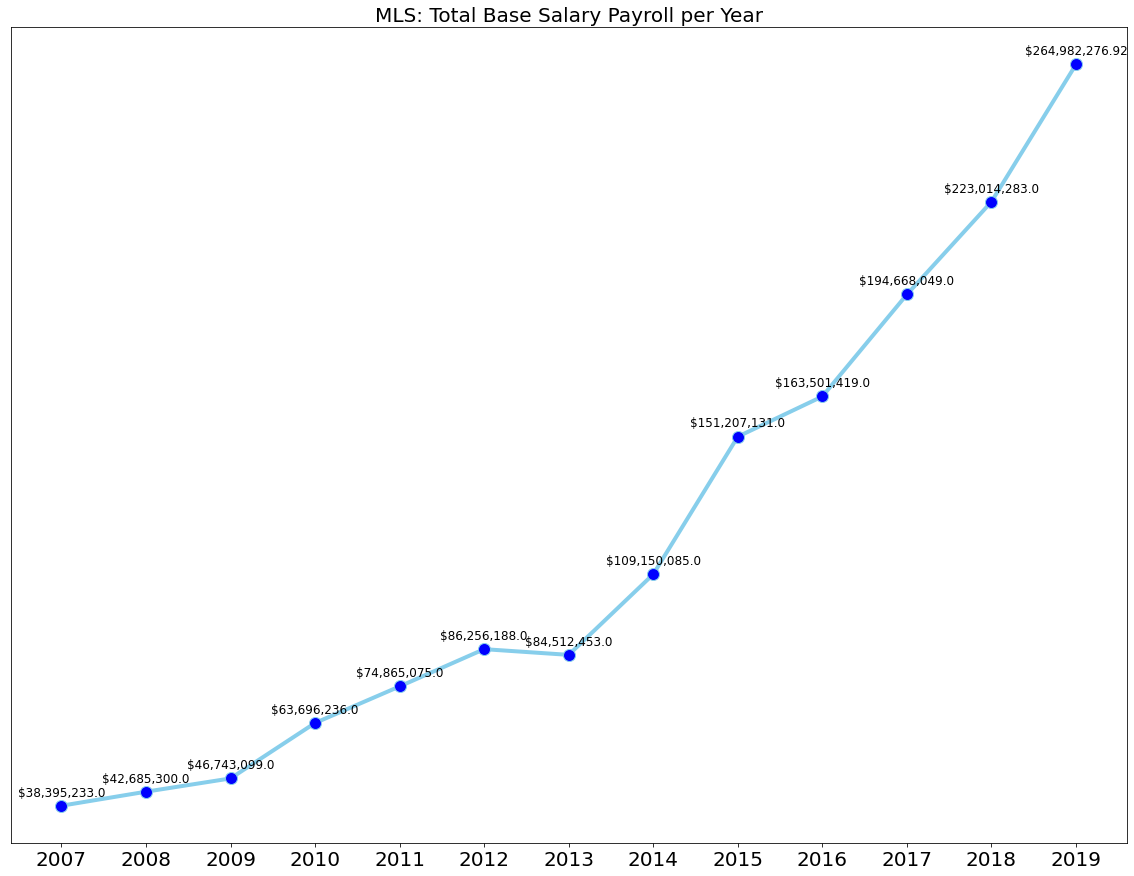

In [10]:
#season as our x & base_salary as our y
season = [season for season, y in every_year.groupby('Season')]
base_salary = every_year['Base Salary']


#figure size
plt.figure(1, figsize=(20,15))

# line plots - X,Y, blue round point with sky-blue line
plt.plot(season, base_salary, marker = 'o',markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

#x & y ticks
plt.xticks(season, fontsize = 20)
plt.yticks([])

#title for plot
plt.title('MLS: Total Base Salary Payroll per Year', fontsize = 20, color='Black')


# zip joins x and y coordinates in pairs
for x,y in zip(season,round(base_salary,2)):

    #label = "${:.2f}".format(y)
    
    #plot the label with a comma for legibility
    label = (f"${y:,}")

    plt.annotate(label, # this is the text ^
                 (x,y), # this is the point to label 
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize = 12)

# show graph
plt.show()

### Analyzing data - 2007 & 2019

In [11]:
#data for 2007 & 2019

_07 = every_year.iloc[0]

_19 = every_year.iloc[12]

In [12]:
#calculating the percent change from 2007 to 2019

percent_change = round(((_19['Base Salary'] - _07['Base Salary'])/ _07['Base Salary']) * 100,2)
percent_change

print(f"With there being a {percent_change}% increase in Total Base Salary Payroll from 2007 to 2019, let's analyze both years a bit more")

With there being a 590.14% increase in Total Base Salary Payroll from 2007 to 2019, let's analyze both years a bit more


In [13]:
#Give y data from 2007 

y = all_team_salaries[all_team_salaries['Season'] == 2007]
y = y.sort_values(by = 'Club')

y

,Season,Club,Total Compensation,Base Salary
0,2007,CHI,4716305.0,4412518.0
1,2007,CHV,1789647.0,1678272.0
2,2007,CLB,2108225.0,1889550.0
3,2007,COL,2281303.0,2181153.0
4,2007,DAL,3072765.0,2790740.0
5,2007,DC,2276390.0,2101315.0
6,2007,HOU,2434147.0,2350047.0
7,2007,LA,9322054.0,8229549.0
8,2007,NE,1945848.0,1850848.0
9,2007,NYRB,4928089.0,4360735.0


In [14]:
#gather the club names for our graph & use it as our x

club = [club for club, y in y.groupby('Club')]
club

['CHI',
 'CHV',
 'CLB',
 'COL',
 'DAL',
 'DC',
 'HOU',
 'LA',
 'NE',
 'NYRB',
 'RSL',
 'SKC',
 'TFC']

### Graph displaying Total Base Salary per Club for 2007

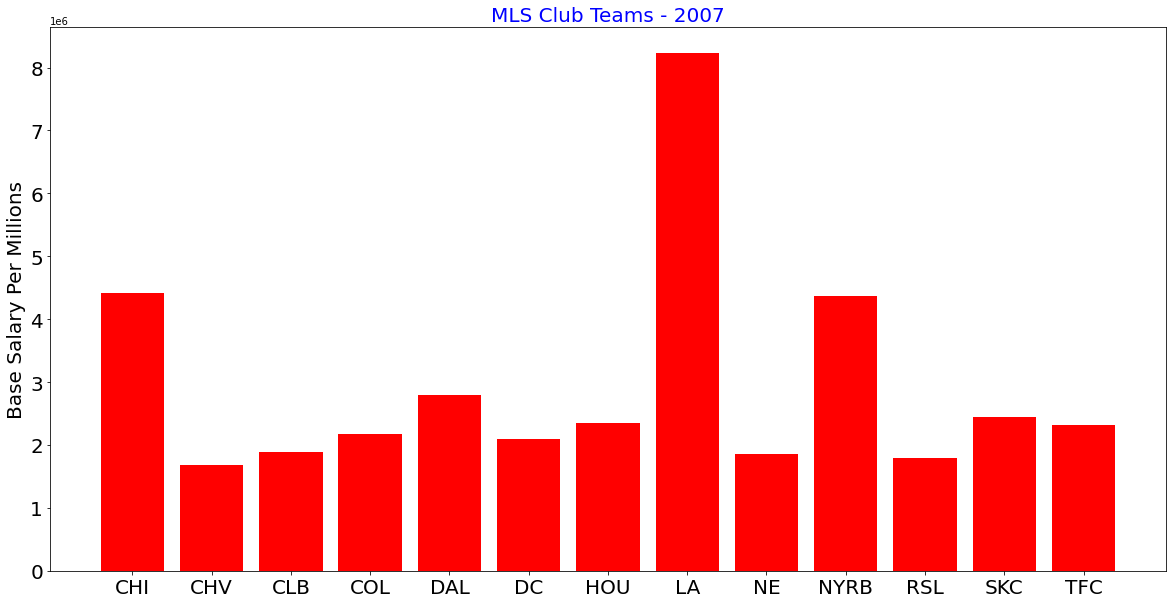

In [15]:
#Configure bar plot of 2007

#figure size
plt.figure(figsize=(20,10))

#plot bar graph
plt.bar(club, y['Base Salary'], color = '#ff0000')


#plot ticks, labels and title
plt.ylabel('Base Salary Per Millions', fontsize = 20)
plt.title('MLS Club Teams - 2007', fontsize = 20, color='Blue')

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Base Salary Per Millions', fontsize = 20)

# show graph
plt.show()

From the bar plot above, we note that **LA Galaxy** had the highest Base Salary Payroll in the league - does that surprise you?

Let's analyze LA is bit more - 


### LA Galaxy

In [16]:
#Give LA data from dataframe with all players
LA = df[(df['Season'] == 2007) & (df['Club'] == 'LA')]

#calculate total Base Salary
total_base = LA['Base Salary'].sum()

#calculate average Base Salary
avg_base_salary = round(LA['Base Salary'].mean(),2)

print(f"The Total Base Salary for LA Galaxy was ${total_base:,}")
print(f"The Average Base Salary for LA Galaxy was ${avg_base_salary:,}")
LA

The Total Base Salary for LA Galaxy was $8,229,549.0
The Average Base Salary for LA Galaxy was $316,521.12


,Season,Club,First Name,Last Name,Position,Total Compensation,Base Salary
6562,2007,LA,David,Beckham,M,6500000.0,5500000.0
6566,2007,LA,Landon,Donovan,F,900000.0,900000.0
6597,2007,LA,Joe,Cannon,GK,192000.0,192000.0
6600,2007,LA,Chris,Klein,M,187250.0,180000.0
6613,2007,LA,Abel,Xavier,D,156000.0,156000.0
6619,2007,LA,Edson,Buddle,F,150000.0,140000.0
6627,2007,LA,Chris,Albright,M-D,142500.0,142500.0
6629,2007,LA,Carlos,Pavon,F,141500.0,132000.0
6636,2007,LA,Peter,Vagenas,M,131875.0,131250.0
6655,2007,LA,Ante,Jazic,D-M,114250.0,108000.0


Although LA Galaxy had the highest Base Payroll in 2007, they had 7 players making no more than 30K (NBA's **rookie minimum** in 2007 was $427,163)

A few **rookies** - 

* Lance Friesz
* Michael Caso
* Josh Tudela
* Ty Harden

Let's visualize the number of players per salary range (these scales will be relative to LA's salaries)

* 10-30K
* 30-50K
* 50-100K
* 100K-200K
* anything above $200k




### Number of Players per Salary Range

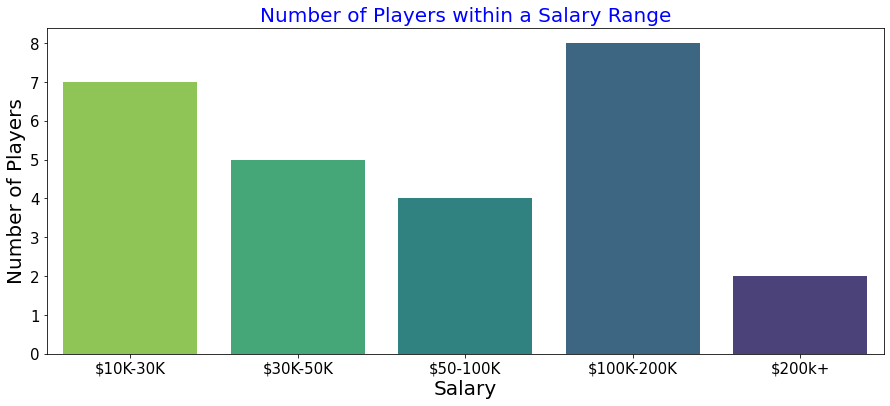

In [17]:
#preview the number of players within a salary range in 2007
sal10_30 = LA[(LA['Base Salary'] >= 10000) & (LA['Base Salary'] <= 30000)]

sal30_50 = LA[(LA['Base Salary'] > 30000) & (LA['Base Salary'] <= 50000)]

sal50_100 = LA[(LA['Base Salary'] > 50000) & (LA['Base Salary'] <= 100000)]

sal100_200 = LA[(LA['Base Salary'] > 100000) & (LA['Base Salary'] <= 200000)]

sal200_above = LA[(LA['Base Salary'] > 200000)]


#plot fig size
plt.figure(figsize=(15,6))

#set x & y - plot bar graph
x = ["$10K-30K","$30K-50K","$50-100K","$100K-200K","$200k+"]
y = [len(sal10_30),len(sal30_50),len(sal50_100),len(sal100_200),len(sal200_above)]

sns.barplot(x=x, y=y, palette="viridis_r")

#plot title & labels
plt.title("Number of Players within a Salary Range", fontsize = 20, color='Blue')
plt.xlabel("Salary", fontsize = 20)
plt.ylabel("Number of Players", fontsize = 20)

#adjust tick sizes for a better visual
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#plot graph
plt.show()

If you recall, the Average Salary in **2007** for a Player at LA Galaxy was **$316,521.12**.
However, I find this completely misleading as a couple individuals can have a massive effect & cause our analysis to be skewed.

For example, David Beckahm and Landon Donovan were making a Base Salary of **5.5 Million & 900K**, respectively.
If you note above, only 8 players had salaries that ranged from  $100K-200K & no one making anything from the range of 200k-900K$



Let's use & print the **Median** salary to give us a better understanding of LA Galaxy's Base Salary Payroll:

In [18]:
#print Median Salary

print("The Median Salary for a Player at LA Galaxy was $" + str(round(LA['Base Salary'].median(),2)))

The Median Salary for a Player at LA Galaxy was $63750.0


### Graph displaying total base salary for 2019

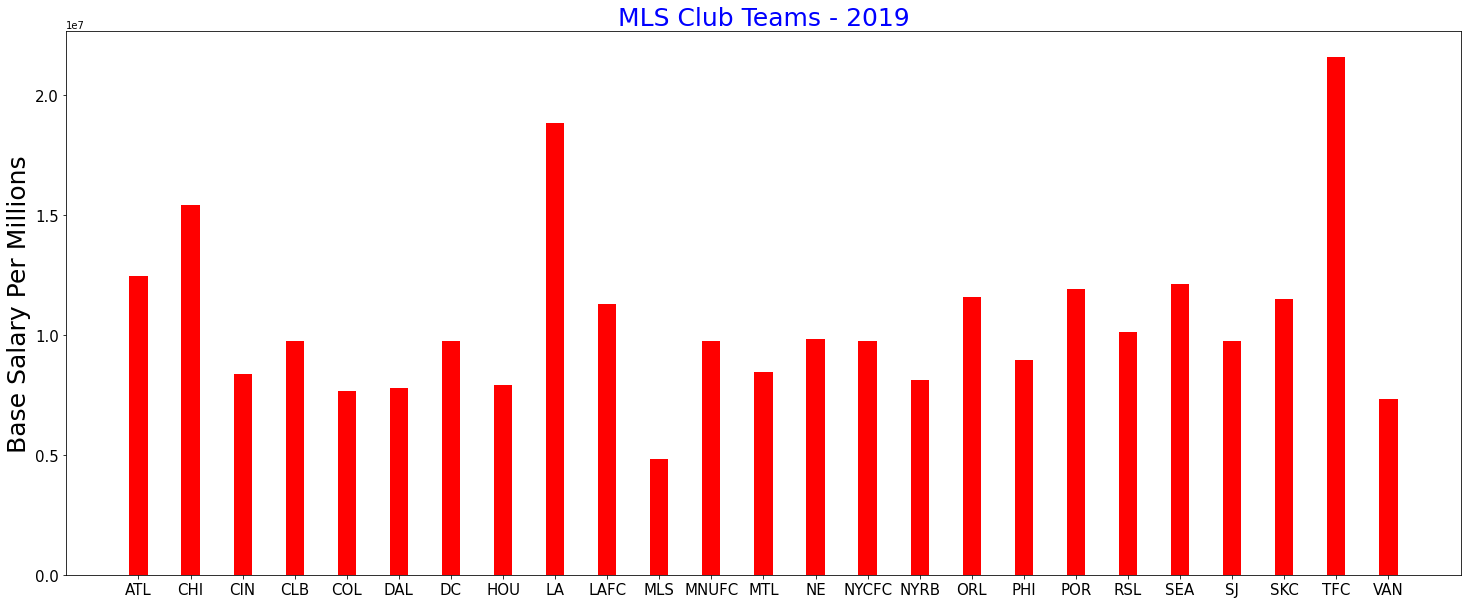

In [19]:
#give y_2019 data from 2019

y_2019 = all_team_salaries[all_team_salaries['Season'] == 2019]
y_2019 = y_2019.sort_values(by = 'Club')
club = [club for club, y in y_2019.groupby('Club')]
club

#figure size
plt.figure(figsize=(25,10))

#plot bar graph
plt.bar(club,y_2019['Base Salary'], width = 0.35, color = '#ff0000')

#plot title & y labels
plt.title("MLS Club Teams - 2019", fontsize = 25, color='Blue')
plt.ylabel('Base Salary Per Millions', fontsize = 25)

#adjust tick sizes for a better visual
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#show graph
plt.show()

From the bar plot above, we note that **Toronto FC (TFC)** had the highest Base Salary Payroll in the 2019 league 

Let's analyze a bit more - 


### Toronto FC

In [20]:
#Give TFC data from dataframe for all players in 2019 (TFC)
TFC = df[(df['Season'] == 2019) & (df['Club'] == 'TFC')]


#calculate total base salary, average salary & median salary - 
total_base = TFC['Base Salary'].sum()
avg_base_salary = round(TFC['Base Salary'].mean(),2)
median_base_salary = round(TFC['Base Salary'].median(),2)

print(f"The Total Base Salary for Toronto FC was ${total_base:,}")
print(f"The Average Base Salary for Toronto FC was ${avg_base_salary:,}")
print(f"The Median Base Salary for Toronto FC was ${median_base_salary:,}")

TFC.sort_values(by = 'Base Salary', ascending = False)

The Total Base Salary for Toronto FC was $21,595,740.84
The Average Base Salary for Toronto FC was $674,866.9
The Median Base Salary for Toronto FC was $192,264.0


,Season,Club,First Name,Last Name,Position,Total Compensation,Base Salary
654,2019,TFC,Michael,Bradley,M,6500000.00,6000000.00
649,2019,TFC,Jozy,Altidore,F,6332250.04,4891250.04
675,2019,TFC,Alejandro,Pozuelo,M-F,3800000.04,3800000.04
665,2019,TFC,Omar,Gonzalez,D,1193935.50,918000.00
673,2019,TFC,Jonathan,Osorio,M,776250.00,750000.00
652,2019,TFC,Nicolas,Benezet,M-F,600000.00,600000.00
667,2019,TFC,Chris,Mavinga,D,663333.33,600000.00
656,2019,TFC,Laurent,Ciman,D,435624.96,399999.96
668,2019,TFC,Drew,Moor,D,375000.00,375000.00
653,2019,TFC,Alex,Bono,GK,382000.04,350000.04


Although Toronto FC (TFC) had the highest Base Payroll in 2019, they had 6 players making less than 60K (NBA's rookie minimum in 2019 was $893,310) Recall that in 2007 it was 427,163...

A few rookies were the following - 

* Noble Okello
* Jacob Shaffelburg
* Julian Dunn


Let's visualize the number of players per salary range (these scales will be relative to TFC's salaries)

* 50-100K
* 1000-300K
* 300-600K
* 600K-1 Mill
* 1 Million Plus


### Number of Players per Salary Range

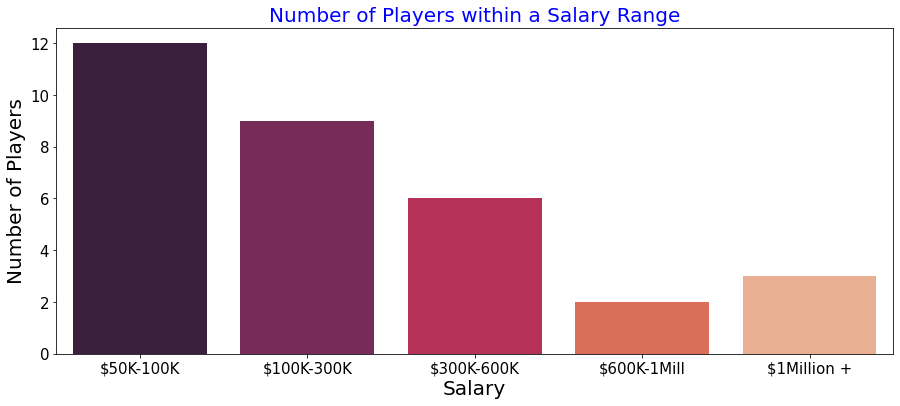

In [21]:
#preview the number of players within a salary range in 2019 (TFC)
sal50_100 = TFC[(TFC['Base Salary'] >= 50000) & (TFC['Base Salary'] <= 100000)]

sal100_300 = TFC[(TFC['Base Salary'] > 100000) & (TFC['Base Salary'] <= 300000)]

sal300_600 = TFC[(TFC['Base Salary'] > 300000) & (TFC['Base Salary'] <= 600000)]

sal600_1mil = TFC[(TFC['Base Salary'] > 600000) & (TFC['Base Salary'] <= 1000000)]

sal1mil_above = TFC[(TFC['Base Salary'] > 1000000)]

#set x & y 
x = ["$50K-100K","$100K-300K","$300K-600K","$600K-1Mill","$1Million +"]
y = [len(sal50_100),len(sal100_300),len(sal300_600),len(sal600_1mil),len(sal1mil_above)]

#figure size
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")

#plot title, x & y labels
plt.title("Number of Players within a Salary Range", fontsize = 20, color='Blue')
plt.xlabel("Salary", fontsize = 20)
plt.ylabel("Number of Players", fontsize = 20)

#adjust tick sizes for a better visual
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#show graph
plt.show()

## III - Base Salary Against Win/Loss/Tie Ratio

With a brief understanding of how Base Salaries differed throughout the years & within Club Teams, let's get an idea of the relationship between money spending (Base Salary) & win percentage for every team since 2007 


In [21]:
#set df to the total sum between clubs per year

df = df[['Season', 'Club','Total Compensation', 'Base Salary']].groupby(['Season', 'Club']).sum().reset_index()

In [22]:
df

,Season,Club,Total Compensation,Base Salary
0,2007,CHI,4716305.00,4412518.00
1,2007,CHV,1789647.00,1678272.00
2,2007,CLB,2108225.00,1889550.00
3,2007,COL,2281303.00,2181153.00
4,2007,DAL,3072765.00,2790740.00
...,...,...,...,...
239,2019,SEA,13678414.29,12142150.44
240,2019,SJ,10619980.43,9762329.16
241,2019,SKC,12070675.60,11524017.72
242,2019,TFC,24267066.18,21595740.84


**Z-Score / Standard Deviation Score**

Let's start off by calculating the Standard Deviation per year & each teams Standardized Salaries (Z score) based on the whole league's average salary **for that year**


### **Chicago Fire** - 2007


Z Score = (observed value - mean of the sample) / (standard deviation of the sample)

In [23]:
#First, the Team Salary - Chicago Fires
chicago_fire = df[(df['Season']==2007) & (df['Club'] == 'CHI')]

#Second, the Average Team Salary for the Year 2007
average_salary = round(df[(df['Season']==2007)]['Base Salary'].mean(),2)


#Third, The Standard Deviation for the Year 2007
standard_deviation = round(df[(df['Season']==2007)].agg({'Base Salary': 'std'}),2)


#Z-Score Formula 
sd_salary = round((chicago_fire['Base Salary'][0] - average_salary) / standard_deviation,2)


In [24]:
#print total base salary
print(f"Chicago's Total Team Base Salary was ${chicago_fire['Base Salary'][0]}")

#print Average Salary
print(f"The Average Team Salary for 2007 was ${average_salary}")

#print the Standard Deviation
print(f"The Standard Deviation Team Salary for 2007 was ${standard_deviation[0]}")

#print the z-score
print(f"Chicago's Total Team Base Salary is {sd_salary[0]} away from the League's average in 2007")

Chicago's Total Team Base Salary was $4412518.0
The Average Team Salary for 2007 was $2953479.46
The Standard Deviation Team Salary for 2007 was $1817572.79
Chicago's Total Team Base Salary is 0.8 away from the League's average in 2007


### Z Score Function Formula 

In [25]:
#Apply Function to every row in a Pandas Dataframe sd = standard salary
def sd_salary(season,base_salary):
    return (base_salary-(df[(df['Season']==season)]['Base Salary'].mean()))/(df[(df['Season']==season)]['Base Salary'].std())

df['SD_Salary'] = df.apply(lambda row: sd_salary(row['Season'], row['Base Salary']), axis=1)
df

,Season,Club,Total Compensation,Base Salary,SD_Salary
0,2007,CHI,4716305.00,4412518.00,0.802740
1,2007,CHV,1789647.00,1678272.00,-0.701599
2,2007,CLB,2108225.00,1889550.00,-0.585357
3,2007,COL,2281303.00,2181153.00,-0.424922
4,2007,DAL,3072765.00,2790740.00,-0.089537
...,...,...,...,...,...
239,2019,SEA,13678414.29,12142150.44,0.428032
240,2019,SJ,10619980.43,9762329.16,-0.232196
241,2019,SKC,12070675.60,11524017.72,0.256545
242,2019,TFC,24267066.18,21595740.84,3.050717


### LA Galaxy 2007 & Toronto FC 2019

In [26]:
df[(df['Club'] == 'LA') & (df['Season'] == 2007)]

,Season,Club,Total Compensation,Base Salary,SD_Salary
7,2007,LA,9322054.0,8229549.0,2.902811


In [27]:
df[(df['Club'] == 'TFC') & (df['Season'] == 2019)]

,Season,Club,Total Compensation,Base Salary,SD_Salary
242,2019,TFC,24267066.18,21595740.84,3.050717


Of course their standard scores are higher than the average because they had the highest Base Salary Payroll for those years

### Import Game Log Data

In [28]:
#gathered data from Season 2007 - 2018 - Games Played, W(Wins), L(Losses), T(Ties)

df_games = pd.read_csv('Desktop\MLS_Games.csv')

In [29]:
#print df_teams

df_games

,Season,Club,Played,W,L,T
0,2007,CHV,30,15,7,8
1,2007,HOU,30,15,8,7
2,2007,DAL,30,13,12,5
3,2007,COL,30,9,13,8
4,2007,LA,30,9,14,7
...,...,...,...,...,...,...
237,2019,SJ,34,13,16,5
238,2019,COL,34,12,16,6
239,2019,HOU,34,12,18,4
240,2019,KC,34,10,16,8


In [30]:
#change KC to SKC as we did to df in the beginning

df_games['Club'] = df_games['Club'].replace(['KC'], 'SKC')
df_games[df_games['Club'] == 'SKC']

,Season,Club,Played,W,L,T
10,2007,SKC,30,11,12,7
16,2008,SKC,30,11,10,9
32,2009,SKC,30,8,13,9
44,2010,SKC,30,11,13,6
58,2011,SKC,34,13,9,12
76,2012,SKC,34,18,7,9
96,2013,SKC,34,17,10,7
118,2014,SKC,34,14,13,7
148,2015,SKC,34,14,11,9
167,2016,SKC,34,13,13,8


### Winning Percentage Formula

In [31]:
#Calculate the Win/Loss/Tie Percentage Ration of each team per Season


df_games['Winning_Percent'] = ((df_games['W'] + (df_games['T'] * .5)) / df_games['Played'])

In [32]:
#print df_teams

df_games

,Season,Club,Played,W,L,T,Winning_Percent
0,2007,CHV,30,15,7,8,0.633333
1,2007,HOU,30,15,8,7,0.616667
2,2007,DAL,30,13,12,5,0.516667
3,2007,COL,30,9,13,8,0.433333
4,2007,LA,30,9,14,7,0.416667
...,...,...,...,...,...,...,...
237,2019,SJ,34,13,16,5,0.455882
238,2019,COL,34,12,16,6,0.441176
239,2019,HOU,34,12,18,4,0.411765
240,2019,SKC,34,10,16,8,0.411765


In [33]:
#Merge df & df_teams 

df_merged = df.merge(df_games, on=['Season','Club'])

In [34]:
df_merged

,Season,Club,Total Compensation,Base Salary,SD_Salary,Played,W,L,T,Winning_Percent
0,2007,CHI,4716305.00,4412518.00,0.802740,30,10,10,10,0.500000
1,2007,CHV,1789647.00,1678272.00,-0.701599,30,15,7,8,0.633333
2,2007,CLB,2108225.00,1889550.00,-0.585357,30,9,11,10,0.466667
3,2007,COL,2281303.00,2181153.00,-0.424922,30,9,13,8,0.433333
4,2007,DAL,3072765.00,2790740.00,-0.089537,30,13,12,5,0.516667
...,...,...,...,...,...,...,...,...,...,...
237,2019,SEA,13678414.29,12142150.44,0.428032,34,16,10,8,0.588235
238,2019,SJ,10619980.43,9762329.16,-0.232196,34,13,16,5,0.455882
239,2019,SKC,12070675.60,11524017.72,0.256545,34,10,16,8,0.411765
240,2019,TFC,24267066.18,21595740.84,3.050717,34,13,10,11,0.544118




### San Jose Earthquakes Scatter Plot 

In [35]:
#grab data for SJ & print
san_jose = df_merged[df_merged['Club'] == 'SJ']

san_jose

,Season,Club,Total Compensation,Base Salary,SD_Salary,Played,W,L,T,Winning_Percent
24,2008,SJ,2503383.00,2401588.00,-0.395457,30,8,13,9,0.416667
39,2009,SJ,2116204.00,2003760.00,-0.668705,30,7,14,9,0.383333
55,2010,SJ,2518590.00,2273338.00,-0.507423,30,13,10,7,0.550000
72,2011,SJ,2853603.00,2600712.00,-0.489515,34,8,12,14,0.441176
91,2012,SJ,3174895.00,2878166.00,-0.502359,34,19,6,9,0.691176
110,2013,SJ,3776312.00,3558742.00,-0.374310,34,14,11,9,0.544118
129,2014,SJ,4349504.00,3957076.00,-0.501004,34,6,16,12,0.352941
149,2015,SJ,5332505.00,4821892.00,-0.532816,34,13,13,8,0.500000
169,2016,SJ,7161825.00,6471917.00,-0.344551,34,8,12,14,0.441176
191,2017,SJ,8444247.00,7759570.00,-0.269704,34,13,14,7,0.485294


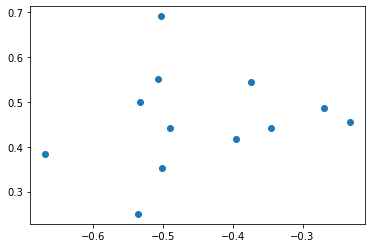

In [36]:
#plot scatter SD_salary against Winning_Percent
plt.scatter(x = san_jose['SD_Salary'], y = san_jose['Winning_Percent'])

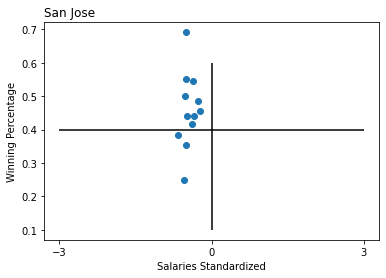

In [37]:
#plot scatter for SD_salary against Winning_Percent
plt.scatter(x = san_jose['SD_Salary'], y = san_jose['Winning_Percent'])

#plot title & labels
plt.title('San Jose', position = (0,1), ha = 'left')
plt.ylabel('Winning Percentage')
plt.xlabel('Salaries Standardized')

#set horizontal & vertical lines
plt.hlines(0.4,-3, 3)
plt.vlines(0,.1,.6)
plt.xticks([-3,0,3])

#show graph
plt.show()

### Simple Linear Regression Model 

In [38]:
#linear regression model using polyfit
model = np.polyfit(x=san_jose['SD_Salary'], y = san_jose['Winning_Percent'], deg=1)
predict = np.poly1d(model)

#predict values based on the standard scores of san jose's base salary z score
predict(san_jose['SD_Salary'])

array([0.46700896, 0.42552226, 0.45000938, 0.45272827, 0.45077821,
       0.47021958, 0.45098395, 0.44615395, 0.47473793, 0.48610184,
       0.44572386, 0.49179652])

In [39]:
#print the regression coefficient & intercept
model

array([0.1518281 , 0.52705042])

###  Equation: y = 0.249x + .429

### San Jose Earthquakes Scatter Plot w/ Linear Regression

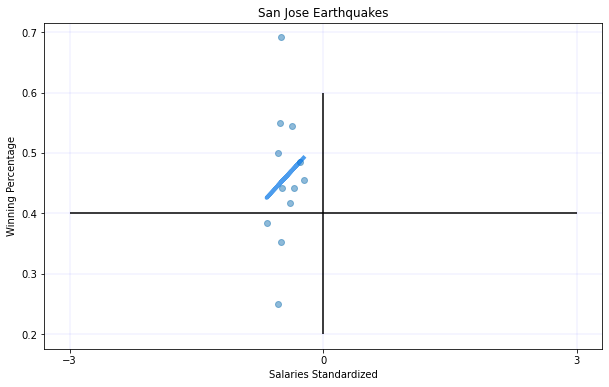

In [40]:
#plot scatter for SD_salary against Winning_Percent
plt.figure(figsize=(10,6))

#plot the line
plt.plot(san_jose['SD_Salary'], predict(san_jose['SD_Salary']), 'blue', alpha=.7, c='#0073e6', linewidth = 4)

#scatter the data
plt.scatter(x = san_jose['SD_Salary'], y = san_jose['Winning_Percent'], alpha = .5)

#plot title & labels
plt.title('San Jose Earthquakes')
plt.ylabel('Winning Percentage')
plt.xlabel('Salaries Standardized')

#set horizontal & vertical lines
plt.hlines(0.4,-3, 3)
plt.vlines(0,.2,.6)

#set ticks
plt.xticks([-3,0,3])

#plot grid
plt.grid(color='b', linestyle='-', linewidth=0.20, alpha=0.4)

#show graph
plt.show()

Let's clean this up by having more control over our figure & axes (e.g. remove borders)

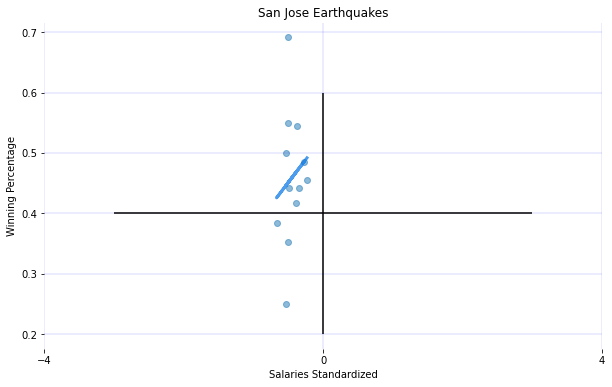

In [41]:
#plot figure size
fig, ax = plt.subplots(figsize=(10,6))

#We can use np.ployfit() to give us a least squares fit, "curve fitting"
model = np.polyfit(x=san_jose['SD_Salary'], y = san_jose['Winning_Percent'], deg=1)
predict = np.poly1d(model)
predict_sj = predict(san_jose['SD_Salary'])

#scatter the data
plt.scatter(x = san_jose['SD_Salary'], y = san_jose['Winning_Percent'], alpha = .5)
    
    
#plot the line
plt.plot(san_jose['SD_Salary'], predict_sj, 'blue', alpha=.7, color ='#0073e6',linewidth =3)
    
#plot title & labels
plt.title("San Jose Earthquakes")
plt.ylabel('Winning Percentage')
plt.xlabel('Salaries Standardized')
    
#set horizontal & vertical lines
plt.hlines(0.4,-3, 3)
plt.vlines(0,.2,.6)
plt.xticks([-4,0,4])
    
#accessing the spines & removing them while keeping the labels & ticks
plt.grid(color='b', linestyle='-', linewidth=0.15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

### Scatter Plot Function

In [42]:
#create a function to gather a list of teams
def club_curve(Club, color):
    
    #plot figure size
    fig, ax = plt.subplots(figsize=(5,5))
    
    #We can use np.ployfit() to give us a least squares fit, "curve fitting"
    model = np.polyfit(Club['SD_Salary'], Club['Winning_Percent'], deg=1)
    predict= np.poly1d(model)

    #plot the regression line
    plt.plot(Club['SD_Salary'], predict(Club['SD_Salary']), 'b-',alpha=.8, color =color,linewidth =3)
    
    #scatter the data
    ax.scatter(x = Club['SD_Salary'], y = Club['Winning_Percent'], alpha = .5, color = color)
    
    
    #plot title & labels
    plt.title(f"{Club['Club'].values[1]}")
    plt.ylabel('Winning Percentage')
    plt.xlabel('Salaries Standardized')
    
    #set horizontal & vertical lines
    plt.hlines(0.4,-3, 3)
    plt.vlines(0,.2,.6)
    plt.xticks([-3,0,3])
    
    #accessing the spines & removing them while keeping the labels & ticks
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)


### Test Function with TFC & The Best Paid Teams in 2019

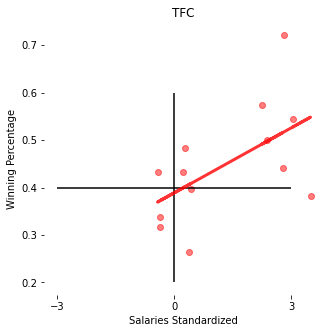

In [43]:
club_curve(df_merged[df_merged['Club'] == 'TFC'], 'red')

In [44]:
Top_Paid_2019={
    'TFC':'red', 
    'LA':'#FFB627',
    'CHI':'#2770ff', 
    'LAFC':'#4d4100', 
    'SEA':'#33cc33'
}
Top_Paid_2019

{'TFC': 'red',
 'LA': '#FFB627',
 'CHI': '#2770ff',
 'LAFC': '#4d4100',
 'SEA': '#33cc33'}

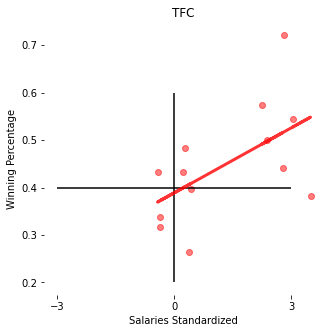

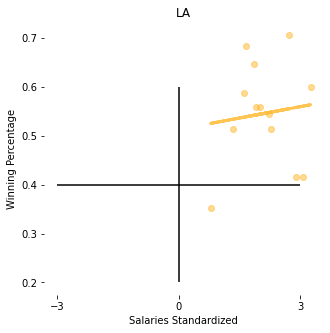

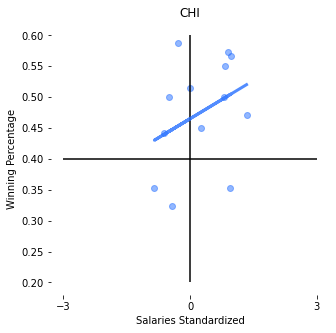

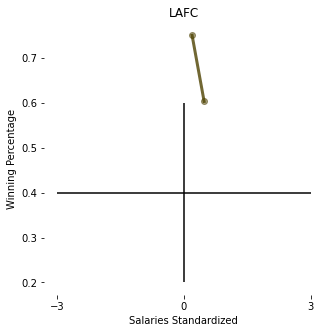

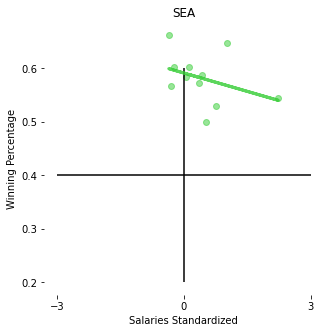

In [45]:
for club,color in Top_Paid_2019.items():
    club_curve(df_merged[(df_merged['Club']==club)],color)

### Scatter Plot Function -  1 row with 5 columns

In [46]:
def club_curve(Club, ax, color):
    
    #We can use np.ployfit() to give us a least squares fit, "curve fitting"
    model = np.polyfit(Club['SD_Salary'], Club['Winning_Percent'], deg=1)
    predict= np.poly1d(model)

    
    #scatter the data
    ax.scatter(x = Club['SD_Salary'], y = Club['Winning_Percent'], alpha = .6, color = color)
    
    #plot the regression line
    ax.plot(Club['SD_Salary'], predict(Club['SD_Salary']),alpha=.9,color =color,linewidth =3)

    
    #plot title & labels
    ax.set_title(f"{Club['Club'].values[0]}" )
    
    
    #set horizontal & vertical lines
    ax.hlines(0.4,-3, 3)
    ax.vlines(0,.2,.6)
    
    #AxesSubplot' object has no attribute 'xticks' - let's use plt
    plt.xticks([-3,0,3])
    
    #accessing the spines & removing them while keeping the labels & ticks
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

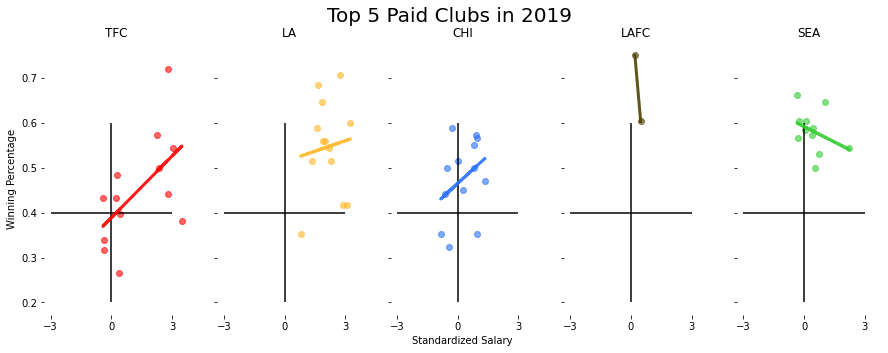

In [47]:

#1 row with 5 columns
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)

# plot title
fig.suptitle('Top 5 Paid Clubs in 2019', ha='center',color = 'Black',fontsize=20,va='top',) 

# plot x & y labels - 
ax[2].set(xlabel='Standardized Salary')
ax[0].set(ylabel='Winning Percentage')

col=0 # # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Top_Paid_2019.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1
    


 

**Toronto FC** - You'll notice that Toronto has always had a relative linear increase in terms of Base Salary Spending & Winning Percentage. There's that gap (which starts in 2014) where Toronto's Base Salary grew exponentially. In the year 2014, Toronto certainly won the offseason - laying out about nine figures in transfer fee's. Ever since, they've gone on to win the MLS Cup in 2017 & were runner-ups in 2016 and 2019
  
     
**LA Galaxy** - It's a no brainer that LA has such a high standard score & Winning Percentage. Since 2007, LA Galaxy have been MLS Champions three times (2011, 2012, 2014) & runner-ups in 2009. Although championships have stalled, LA has never had problems attracting huge stars that not only produce on the field but demand high wages. (David Beckham, Zlatan Ibrahimović, Giovani dos Santos, Steven Gerrard)

**Chicago Fire** - Relative to success on the field, Chicago tends to fluctuate. Take for exmaple, in 2012 Chicago had a winning percentage of 59% and 51% in 2013. After that, they had an awful drought for 3 years with a winning percentage of about 20% - their salaries were also below the leagues average. The awful note is that their Base Salaries increased above average in 2017 but losses also increased.


**LAFC** - Unfortunately, for LAFC we only have two years worth of data - graphing a relationship at the moment isn't the greatest but it does help note that if you have a positive standard score, it may help maintain a winning percentage over 30%

**Seattle Sounders** - Seattle began play in 2009 and has since terrorized teams. Regardless of their low to average pay in the beginning, they've never had a winning percentage less than 50% - that's insane. Although they've performed well on the ptich, they have only won the MLS Cup twice in they're 12 year span. 



### Create Dictionary List To Plot All Teams At Once

In [48]:
Eastern_Conference_1={
    'ATL':'#e60000', 
    'CHI':'#2770ff',
    'CIN':'#ffad33', 
    'CLB':'#cccc00', 
    'DC':'#595959'
}

Eastern_Conference_2={
    'MTL':'#3366ff', 
    'NE':'#3333ff',
    'NYCFC':'#6cc5d4', 
    'NYRB':'#ff6666', 
    'ORL':'#bb33ff'
}

Eastern_Conference_3={
    'PHI':'#e6b800', 
    'TFC':'#e60000'
}

Western_Conference_1={
    'COL':'#80002a', 
    'DAL':'#ff4d4d',
    'HOU':'#ffa31a', 
    'LA':'#FFB627', 
    'LAFC':'#595959'
}

Western_Conference_2={
    'MNUFC':'#5c5c8a', 
    'POR':'#2d862d',
    'RSL':'#e60000', 
    'SJ':'#0073e6', 
    'SEA':'#33cc33'
}

Western_Conference_3={
    'SKC':'#6cc5d4', 
    'VAN':'#2770ff'
}

### Scatter Plot For Eastern Conference & Western Conference

<ipython-input-49-6942194cd2b4>:11: RankWarning: Polyfit may be poorly conditioned
  club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)


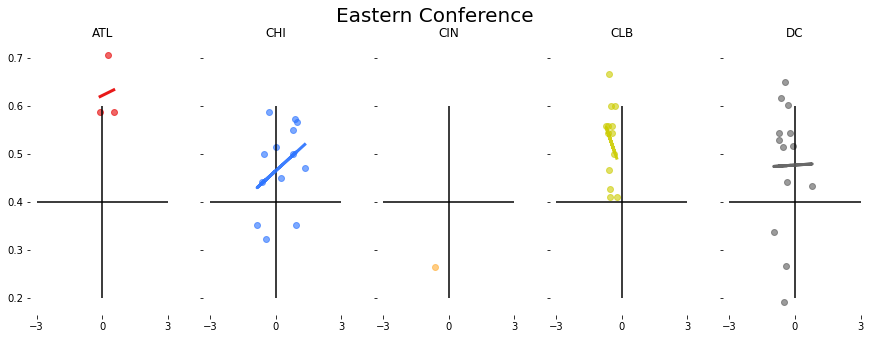

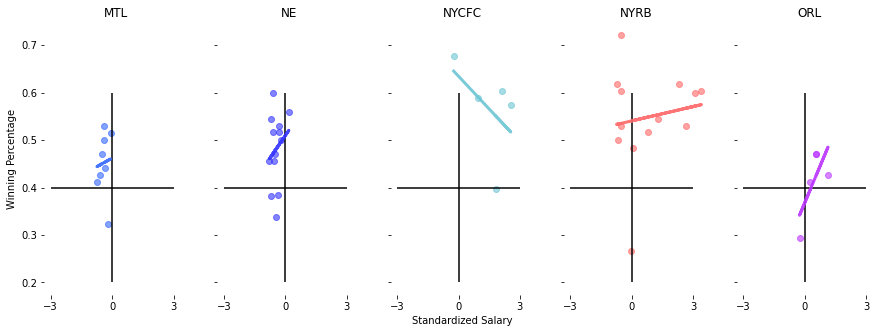

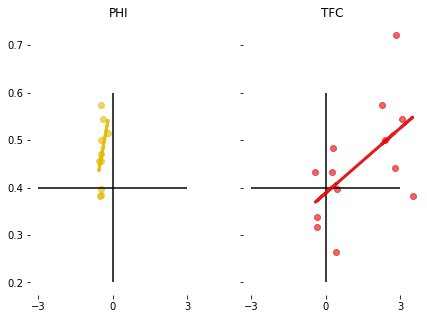

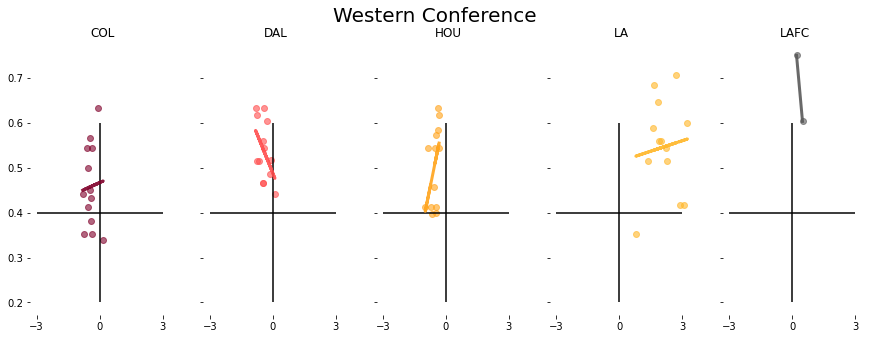

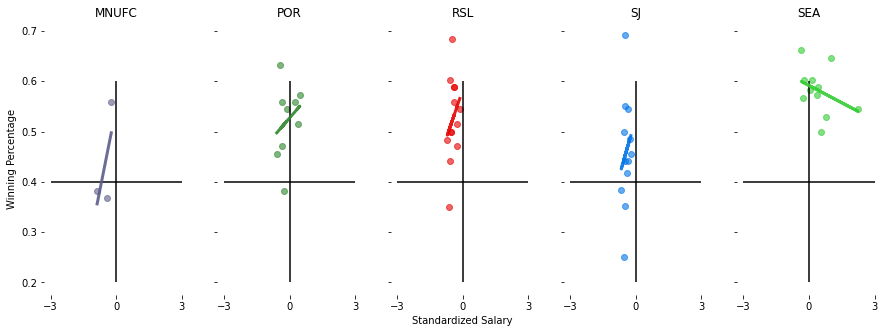

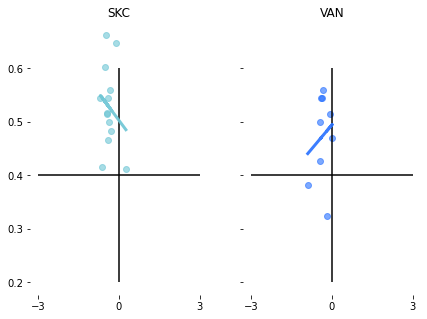

In [49]:
#THE FIRST PLOT --------------------------
#1 row with 5 columns
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)

# plot title
fig.suptitle('Eastern Conference', ha='center',color = 'Black',fontsize=20,va='top',) 


col=0  # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Eastern_Conference_1.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1
    

#THE SECOND PLOT--------------------------
#1 row with 5 columns
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)
 

# plot x & y labels - 
ax[2].set(xlabel='Standardized Salary')
ax[0].set(ylabel='Winning Percentage')

col=0 # # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Eastern_Conference_2.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1
    

#THE THIRD PLOT--------------------------
#1 row with 5 columns
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(7,5),sharex=True, sharey=True)
 

col=0 # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Eastern_Conference_3.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1
    

#THE FORTH PLOT--------------------------
#1 row with 5 columns
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)
 
fig.suptitle('Western Conference', ha='center',color = 'Black',fontsize=20,va='top',) 


col=0  # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Western_Conference_1.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1
    

#THE FIFTHPLOT--------------------------
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)
 

# plot x & y labels - 
ax[2].set(xlabel='Standardized Salary')
ax[0].set(ylabel='Winning Percentage')

col=0  # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Western_Conference_2.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1
    
    
#THE SIXTH PLOT--------------------------
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(7,5),sharex=True, sharey=True)
 

col=0  # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
for Club,color in Western_Conference_3.items():
    club_curve(df_merged[(df_merged['Club']==Club)],ax[col], color)
    col=col+1

### Recreating The Scatter Plot - Nested For Loop For All Teams instead of mutiple plot calls

In [50]:
Eastern_Conference_1={
    'ATL':'#e60000', 
    'CHI':'#2770ff',
    'CIN':'#ffad33', 
    'CLB':'#cccc00', 
    'DC':'#595959'
}

Eastern_Conference_2={
    'MTL':'#3366ff', 
    'NE':'#3333ff',
    'NYCFC':'#6cc5d4', 
    'NYRB':'#ff6666', 
    'ORL':'#bb33ff'
}

Eastern_Conference_3={
    'PHI':'#e6b800', 
    'TFC':'#e60000',
    'COL':'#80002a', 
    'DAL':'#ff4d4d',
    'HOU':'#ffa31a' 
}

Western_Conference_1={
    'LA':'#FFB627', 
    'LAFC':'#595959',
    'MNUFC':'#5c5c8a', 
    'POR':'#2d862d',
    'RSL':'#e60000'
}

Western_Conference_2={
    'SJ':'#0073e6', 
    'SEA':'#33cc33',
    'SKC':'#6cc5d4', 
    'VAN':'#2770ff'
}



In [51]:
leagues = [Eastern_Conference_1, Eastern_Conference_2, Eastern_Conference_3, Western_Conference_1, Western_Conference_2]

### Nested For Loop For All Teams

<ipython-input-52-d01ab268d403>:19: RankWarning: Polyfit may be poorly conditioned
  club_curve(df_merged[(df_merged['Club']==Club)],ax[row][col], color)


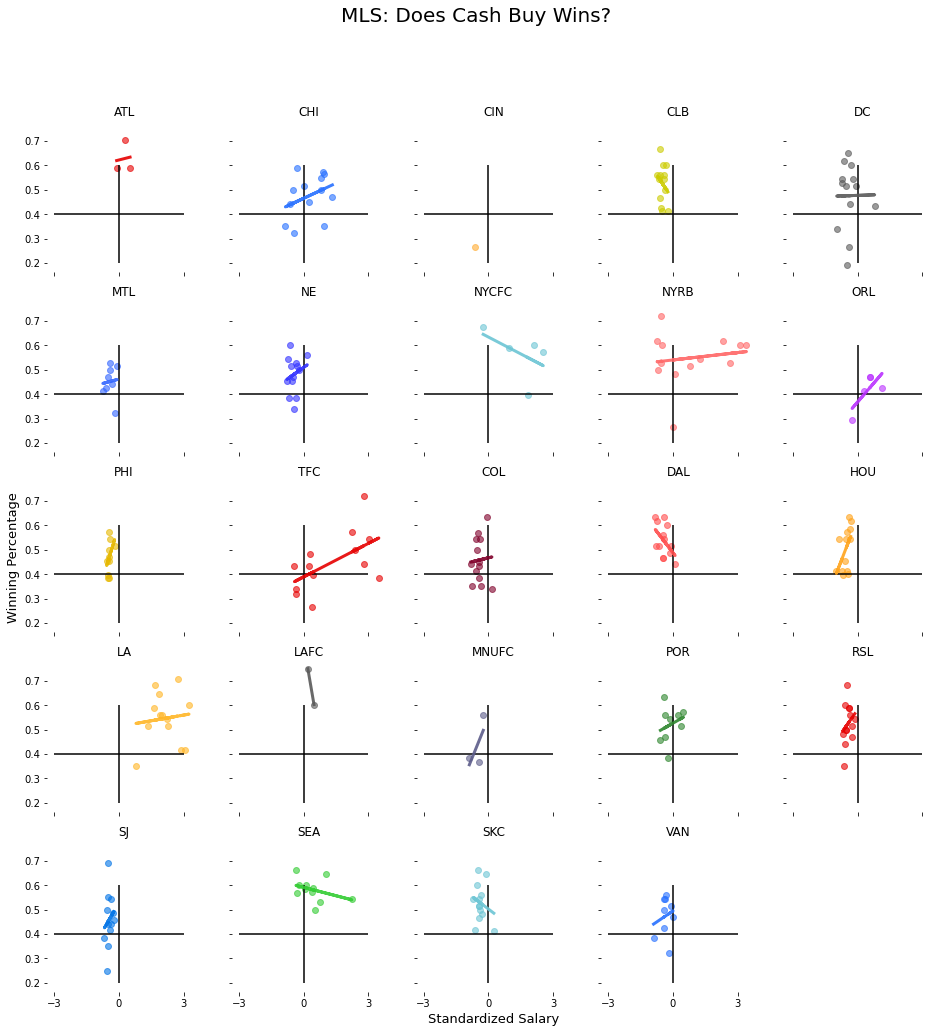

In [52]:
#5 rows with 5 columns
fig, ax = plt.subplots(nrows=5, ncols=5,figsize=(16,16),sharex=True, sharey=True)

# plot title
fig.suptitle('MLS: Does Cash Buy Wins? ', ha='center',color = 'Black',fontsize=20,va='top',) 

#plot x & y labels
ax[4,2].set_xlabel('Standardized Salary', fontsize = 13)
ax[2,0].set_ylabel('Winning Percentage',fontsize = 13)


#ax[2].set(xlabel='Standardized Salary')
#ax.xlabel('Standardized Salary')

row = 0
for league in leagues:
    col=0 # # axes are in a two-dimensional array, indexed by [row, col] (we only have one row for this example)
    for Club,color in league.items():
        club_curve(df_merged[(df_merged['Club']==Club)],ax[row][col], color)
        col=col+1
    row +=1
    
    ax.flat[24].set_visible(False)
    



In [53]:
fig.savefig('MLS.png')

Closing Remarks: 


    I first want to acknowledge that this model/graph has a few Clubs with data worth less than 5 years. Another point, the MLS  does not generate nor have similar salaries compared to the NBA & MLB - in case you're wondering why they're paid 
    lower than other sports in the US. 
    
    However, I would note that based on the scatter plots we see a mixture of trends, which makes it difficult to conclude a relationship between Base Salary and Winning Percentage.
    For example, Clubs such as CLB, MTL, NE, PHI, COL and many more help shed light in displaying where a Club can spend the same amount of money per Year but have drastic changes within their Winning Percentage.

    
    The consequences here are that certain teams can generate a massive amount of revenue, leading to a few teams dominating the league for years. 
    
    For instance, in 2019 Atlanta United (ATL) generated 78 Million dollars in revenue. ATL ended the season in 2nd place and pushed to the Conference Finals.
    Colorado Rapids in the other hand generated the least amount of revenue in the 2019 MLS season - 18 Million dollars. Comparing the two Clubs, that's a 60 Million Dollar difference.
    
    Keep in mind, that's simply one example. Glancing over the plots, you'll note that TFC, LA, NYCFC & NYRB are clubs with high Z Scores & Winning Percentage. Thus, enforcing that a few Clubs pay well and can dominate the league.
    
    A caveat, while it may be tempting to illustrate that certain Clubs pay well, the MLS is known for having star players demand high salaries while the rest of the players make less than average (review the analysis for LA & TFC up above) 
    
    Overall, I'm pleased to see Salary payout increase for players throughout the years but can't conclude that there's a relationship between Base Salary Payroll and Winning Percentage.

  
    